<a href="https://colab.research.google.com/github/mukthar56788/Driver-Behavior-Analysis-Using-K-Means/blob/main/Driver_Behavior_Analysis_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("driver-data.csv", index_col="id")
print(data.head())
print(data.shape)


            mean_dist_day  mean_over_speed_perc
id                                             
3423311935          71.24                    28
3423313212          52.53                    25
3423313724          64.54                    27
3423311373          55.69                    22
3423310999          54.58                    25
(4000, 2)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)


KMeans(n_clusters=4, random_state=42)

In [ ]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", kmeans.labels_)


Cluster Centers:
 [[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [ 50.46127059  32.42823529]
 [177.83509615  70.28846154]]
Cluster Labels:
 [2 2 2 ... 1 1 1]


In [ ]:
print(kmeans.labels_[3000:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 3 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Cluster Distribution:", dict_data)


Cluster Distribution: {0: 2775, 1: 696, 2: 425, 3: 104}


In [ ]:
data["cluster"] = kmeans.labels_

In [ ]:
print(data.head())

            mean_dist_day  mean_over_speed_perc  cluster
id                                                      
3423311935          71.24                    28        2
3423313212          52.53                    25        2
3423313724          64.54                    27        2
3423311373          55.69                    22        2
3423310999          54.58                    25        2


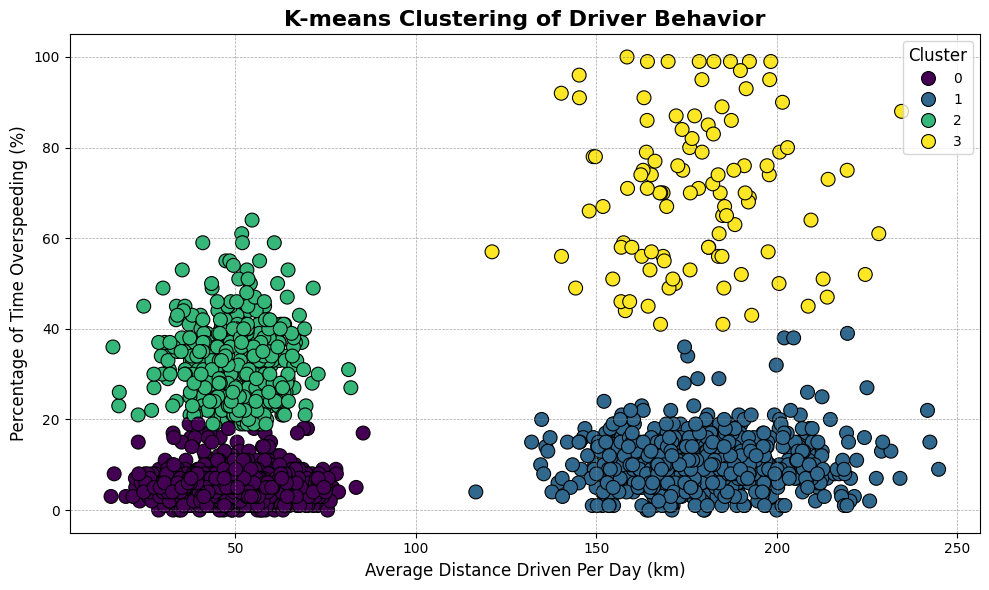

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='mean_dist_day',
    y='mean_over_speed_perc',
    hue='cluster',
    palette='viridis',
    data=data,
    s=100,
    edgecolor='black'
)


plt.title("K-means Clustering of Driver Behavior", fontsize=16, fontweight='bold')
plt.xlabel("Average Distance Driven Per Day (km)", fontsize=12)
plt.ylabel("Percentage of Time Overspeeding (%)", fontsize=12)


plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)


plt.legend(title="Cluster", fontsize=10, title_fontsize=12, loc='upper right')


plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the clustering
print("Inertia (Sum of Squared Errors):", kmeans.inertia_)
# K-means score (negative inertia) - use the original data without the 'cluster' column
print("Negative Score (log-likelihood):", -kmeans.score(data[['mean_dist_day', 'mean_over_speed_perc']]))


Inertia (Sum of Squared Errors): 719601.5383469053
Negative Score (log-likelihood): 719601.5383469055


In [ ]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(data[['mean_dist_day', 'mean_over_speed_perc']], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5911323766293183
